In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [2]:
#initialize dataframe
df = pd.DataFrame()

In [3]:
#read csv file into dataframe
df = pd.read_csv('PEP1.csv')

In [4]:
#return shape of dataframe
df.shape

(1460, 81)

In [5]:
#return variables with null values
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [6]:
#return variables with unique values
for col in df:
    print(col, df[col].unique())

Id [   1    2    3 ... 1458 1459 1460]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 

In [7]:
#Generate two separate datasets for numerical and categorical variables
df_numericalVar = df.select_dtypes(include=[np.number])
df_categoricalVar = df.select_dtypes(exclude=[np.number])

Begin EDA of Numerical Variable Dataset

In [8]:
#Perform missing value treatment
median_imputer = SimpleImputer(missing_values = pd.NA, strategy='median')
median_imputer = median_imputer.fit(df_numericalVar)
imputed_df = median_imputer.transform(df_numericalVar.values)
df_numericalVar = pd.DataFrame(data=imputed_df, columns=median_imputer.get_feature_names_out())
df_numericalVar

c:\Users\saini\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [9]:
#Identify skewness of each variable
df_numericalVar.skew(axis = 0, skipna = False)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
Bedroom           0.211790
Kitchen           4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

Description of Skewness Results:


- The only variable that has normal distribution is the "Id" variable as the skewness is a flat zero since it just increments by one. 
- Four variables are skewed to the left since their skewness is negative: "YearBuilt", "YearRemodAdd", "GarageYrBlt", "GarageCars". The variables have nearly normal distribution since they are close to zero and greater than negative one.
- The remaining 33 variables are all skewed to the right since their skewness is positive.
    - 13 of the 33 variables have nearly normal distribution since they are close to zero and less than one.
    - The remaining 20 variables are heavily skewed to the right as the skewness is greater than one wtih 4 of those variables having a skewness greater than 10.

Identify normal distribution of each variable

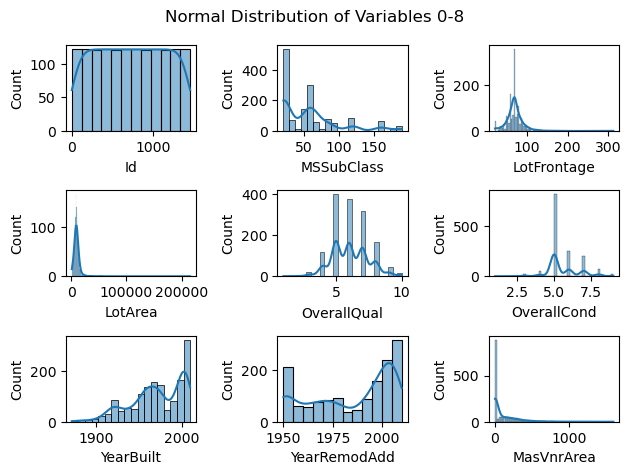

In [10]:
#Variables 0-8 of the dataframe
df_numericalVar1 = df_numericalVar.iloc[:, :9]
fig, axes = plt.subplots(3,3)
fig.suptitle('Normal Distribution of Variables 0-8')

sns.histplot(ax=axes[0,0], data=df_numericalVar1["Id"], kde=True)
sns.histplot(ax=axes[0,1], data=df_numericalVar1["MSSubClass"], kde=True)
sns.histplot(ax=axes[0,2], data=df_numericalVar1["LotFrontage"], kde=True)
sns.histplot(ax=axes[1,0], data=df_numericalVar1["LotArea"], kde=True)
sns.histplot(ax=axes[1,1], data=df_numericalVar1["OverallQual"], kde=True)
sns.histplot(ax=axes[1,2], data=df_numericalVar1["OverallCond"], kde=True)
sns.histplot(ax=axes[2,0], data=df_numericalVar1["YearBuilt"], kde=True)
sns.histplot(ax=axes[2,1], data=df_numericalVar1["YearRemodAdd"], kde=True)
sns.histplot(ax=axes[2,2], data=df_numericalVar1["MasVnrArea"], kde=True)

plt.tight_layout()
plt.show()

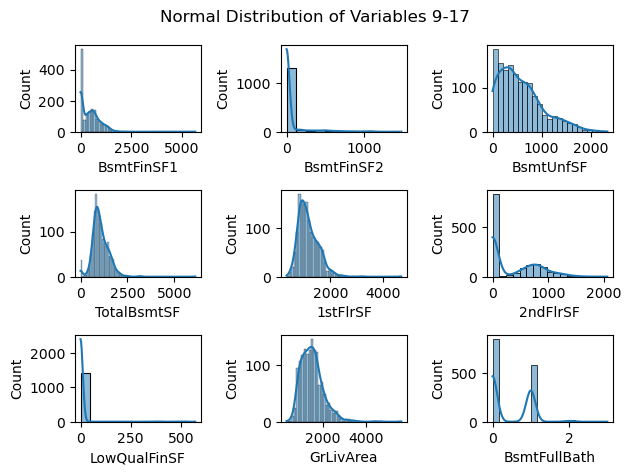

In [11]:
#Identify normal distribution of each variable
#Variables 9-17 of the dataframe
df_numericalVar2 = df_numericalVar.iloc[:, 9:18]
fig, axes = plt.subplots(3,3)
fig.suptitle('Normal Distribution of Variables 9-17')
sns.histplot(ax=axes[0,0], data=df_numericalVar2["BsmtFinSF1"], kde=True)
sns.histplot(ax=axes[0,1], data=df_numericalVar2["BsmtFinSF2"], kde=True)
sns.histplot(ax=axes[0,2], data=df_numericalVar2["BsmtUnfSF"], kde=True)
sns.histplot(ax=axes[1,0], data=df_numericalVar2["TotalBsmtSF"], kde=True)
sns.histplot(ax=axes[1,1], data=df_numericalVar2["1stFlrSF"], kde=True)
sns.histplot(ax=axes[1,2], data=df_numericalVar2["2ndFlrSF"], kde=True)
sns.histplot(ax=axes[2,0], data=df_numericalVar2["LowQualFinSF"], kde=True)
sns.histplot(ax=axes[2,1], data=df_numericalVar2["GrLivArea"], kde=True)
sns.histplot(ax=axes[2,2], data=df_numericalVar2["BsmtFullBath"], kde=True)

plt.tight_layout()
plt.show()

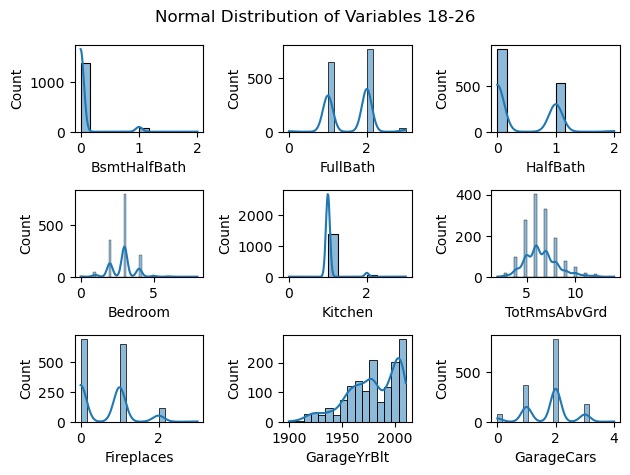

In [12]:
#Identify normal distribution of each variable
#Variables 18-26 of the dataframe
df_numericalVar3 = df_numericalVar.iloc[:, 18:27]
fig, axes = plt.subplots(3,3)
fig.suptitle('Normal Distribution of Variables 18-26')
sns.histplot(ax=axes[0,0], data=df_numericalVar3["BsmtHalfBath"], kde=True)
sns.histplot(ax=axes[0,1], data=df_numericalVar3["FullBath"], kde=True)
sns.histplot(ax=axes[0,2], data=df_numericalVar3["HalfBath"], kde=True)
sns.histplot(ax=axes[1,0], data=df_numericalVar3["Bedroom"], kde=True)
sns.histplot(ax=axes[1,1], data=df_numericalVar3["Kitchen"], kde=True)
sns.histplot(ax=axes[1,2], data=df_numericalVar3["TotRmsAbvGrd"], kde=True)
sns.histplot(ax=axes[2,0], data=df_numericalVar3["Fireplaces"], kde=True)
sns.histplot(ax=axes[2,1], data=df_numericalVar3["GarageYrBlt"], kde=True)
sns.histplot(ax=axes[2,2], data=df_numericalVar3["GarageCars"], kde=True)

plt.tight_layout()
plt.show()

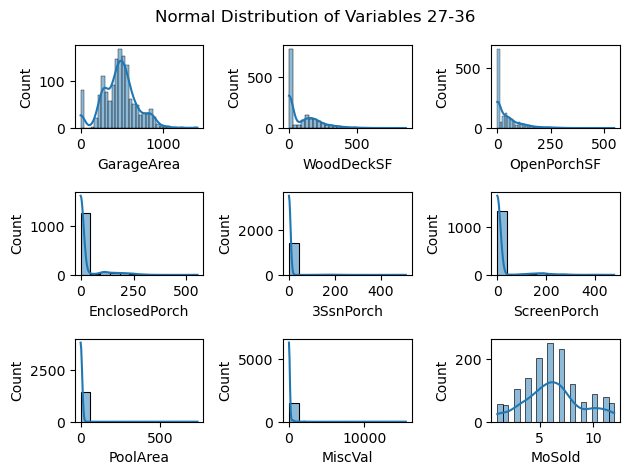

In [13]:
#Identify normal distribution of each variable
#Variables 27-35 of the dataframe
df_numericalVar4 = df_numericalVar.iloc[:, 27:36]
fig, axes = plt.subplots(3,3)
fig.suptitle('Normal Distribution of Variables 27-36')
sns.histplot(ax=axes[0,0], data=df_numericalVar4["GarageArea"], kde=True)
sns.histplot(ax=axes[0,1], data=df_numericalVar4["WoodDeckSF"], kde=True)
sns.histplot(ax=axes[0,2], data=df_numericalVar4["OpenPorchSF"], kde=True)
sns.histplot(ax=axes[1,0], data=df_numericalVar4["EnclosedPorch"], kde=True)
sns.histplot(ax=axes[1,1], data=df_numericalVar4["3SsnPorch"], kde=True)
sns.histplot(ax=axes[1,2], data=df_numericalVar4["ScreenPorch"], kde=True)
sns.histplot(ax=axes[2,0], data=df_numericalVar4["PoolArea"], kde=True)
sns.histplot(ax=axes[2,1], data=df_numericalVar4["MiscVal"], kde=True)
sns.histplot(ax=axes[2,2], data=df_numericalVar4["MoSold"], kde=True)

plt.tight_layout()
plt.show()

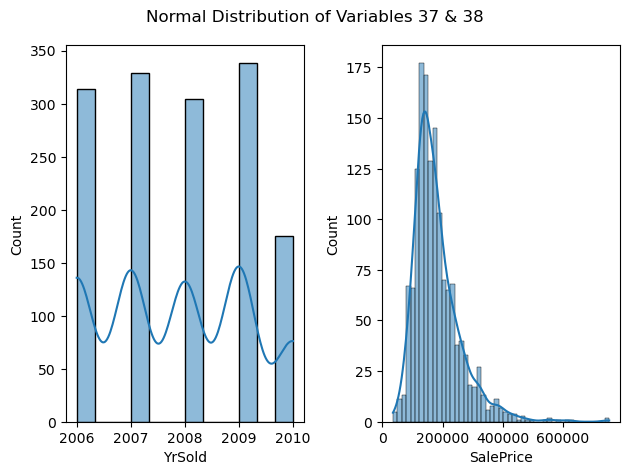

In [14]:
#Identify normal distribution of each variable
#Variables 37 & 38 of the dataframe
df_numericalVar5 = df_numericalVar.iloc[:, 36:38]
fig, axes = plt.subplots(1,2)
fig.suptitle('Normal Distribution of Variables 37 & 38')
sns.histplot(ax=axes[0], data=df_numericalVar5["YrSold"], kde=True)
sns.histplot(ax=axes[1], data=df_numericalVar5["SalePrice"], kde=True)

plt.tight_layout()
plt.show()

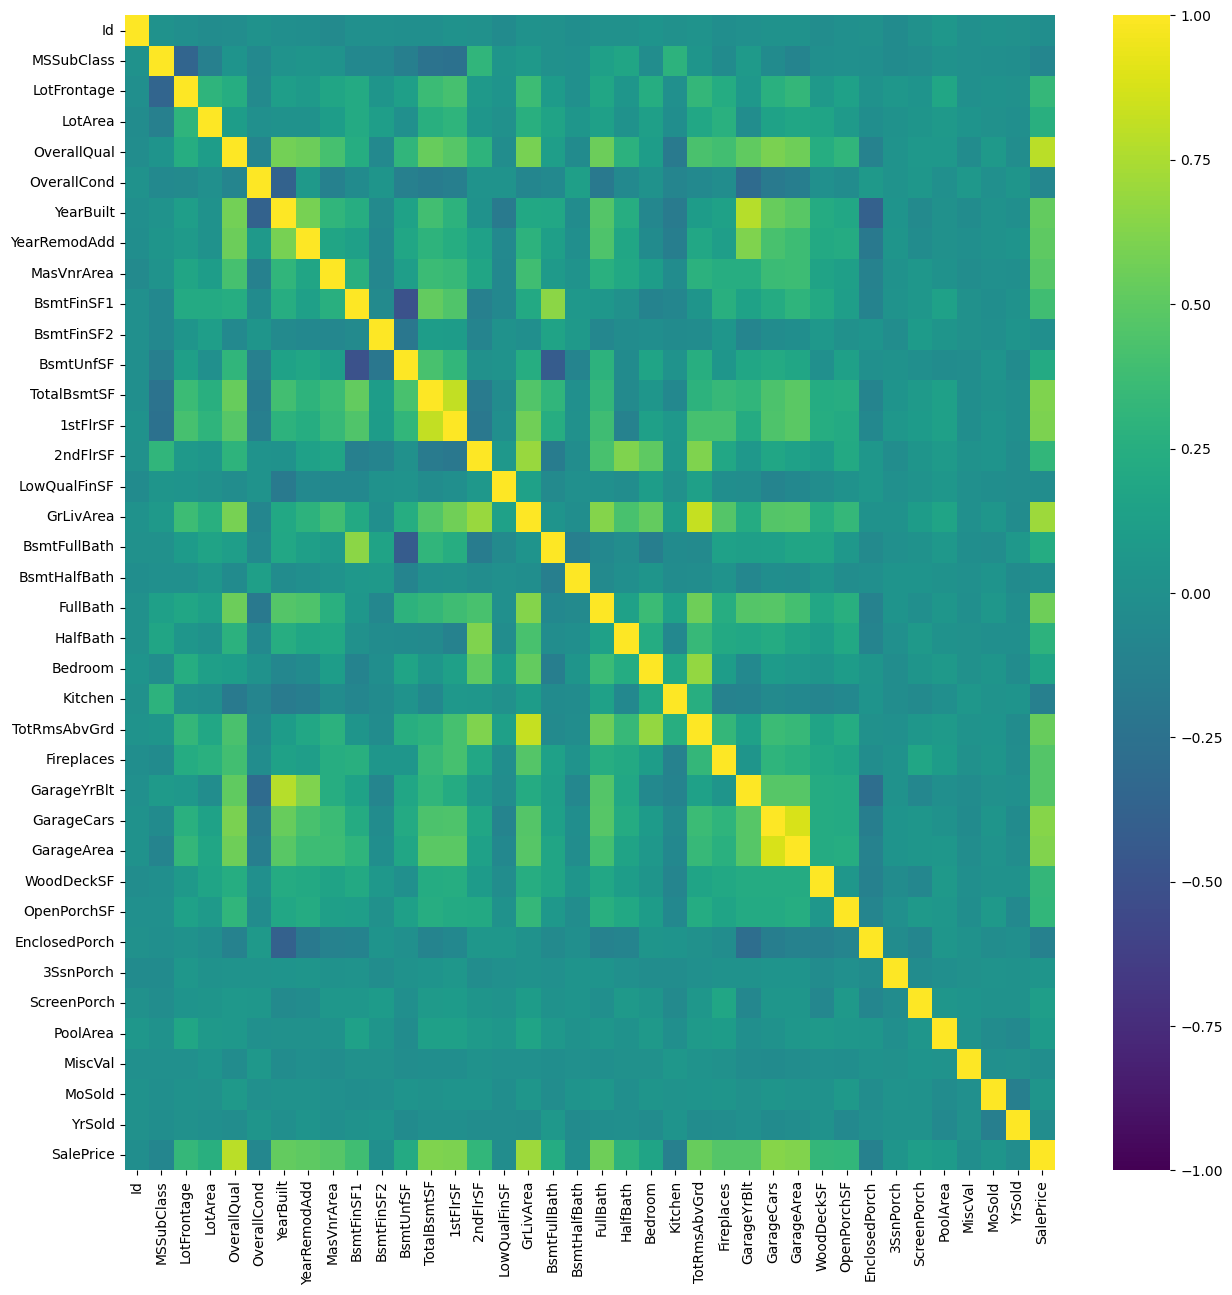

In [15]:
#Identify significant variables using a correlation matrix
corrMatrix = df_numericalVar.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, cmap="viridis", vmax=1, vmin=-1)
plt.show()

<Axes: >

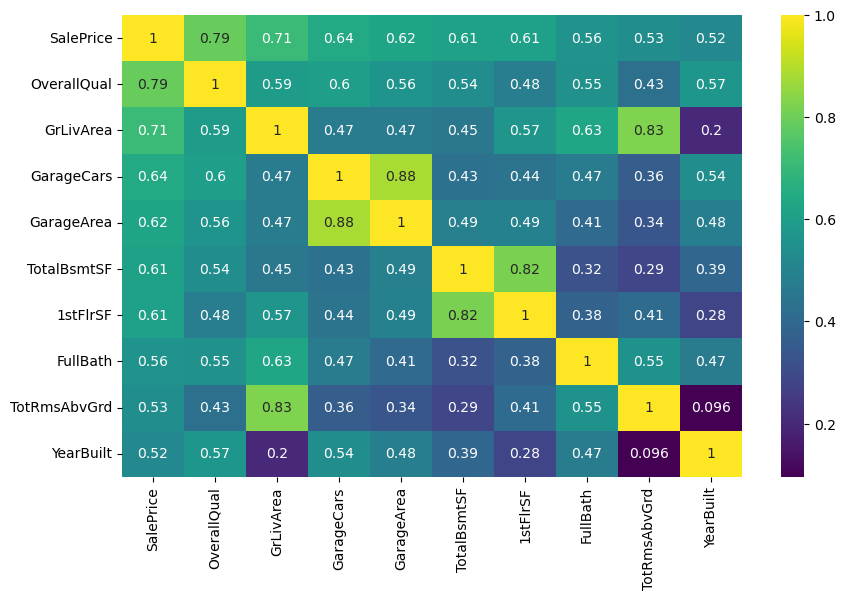

In [16]:
#Print correlation matrix of 10 significant variables closest to SalePrice
n = 10 
cols = df_numericalVar.corr().nlargest(n, 'SalePrice')['SalePrice'].index
cm = df_numericalVar[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

c:\Users\saini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


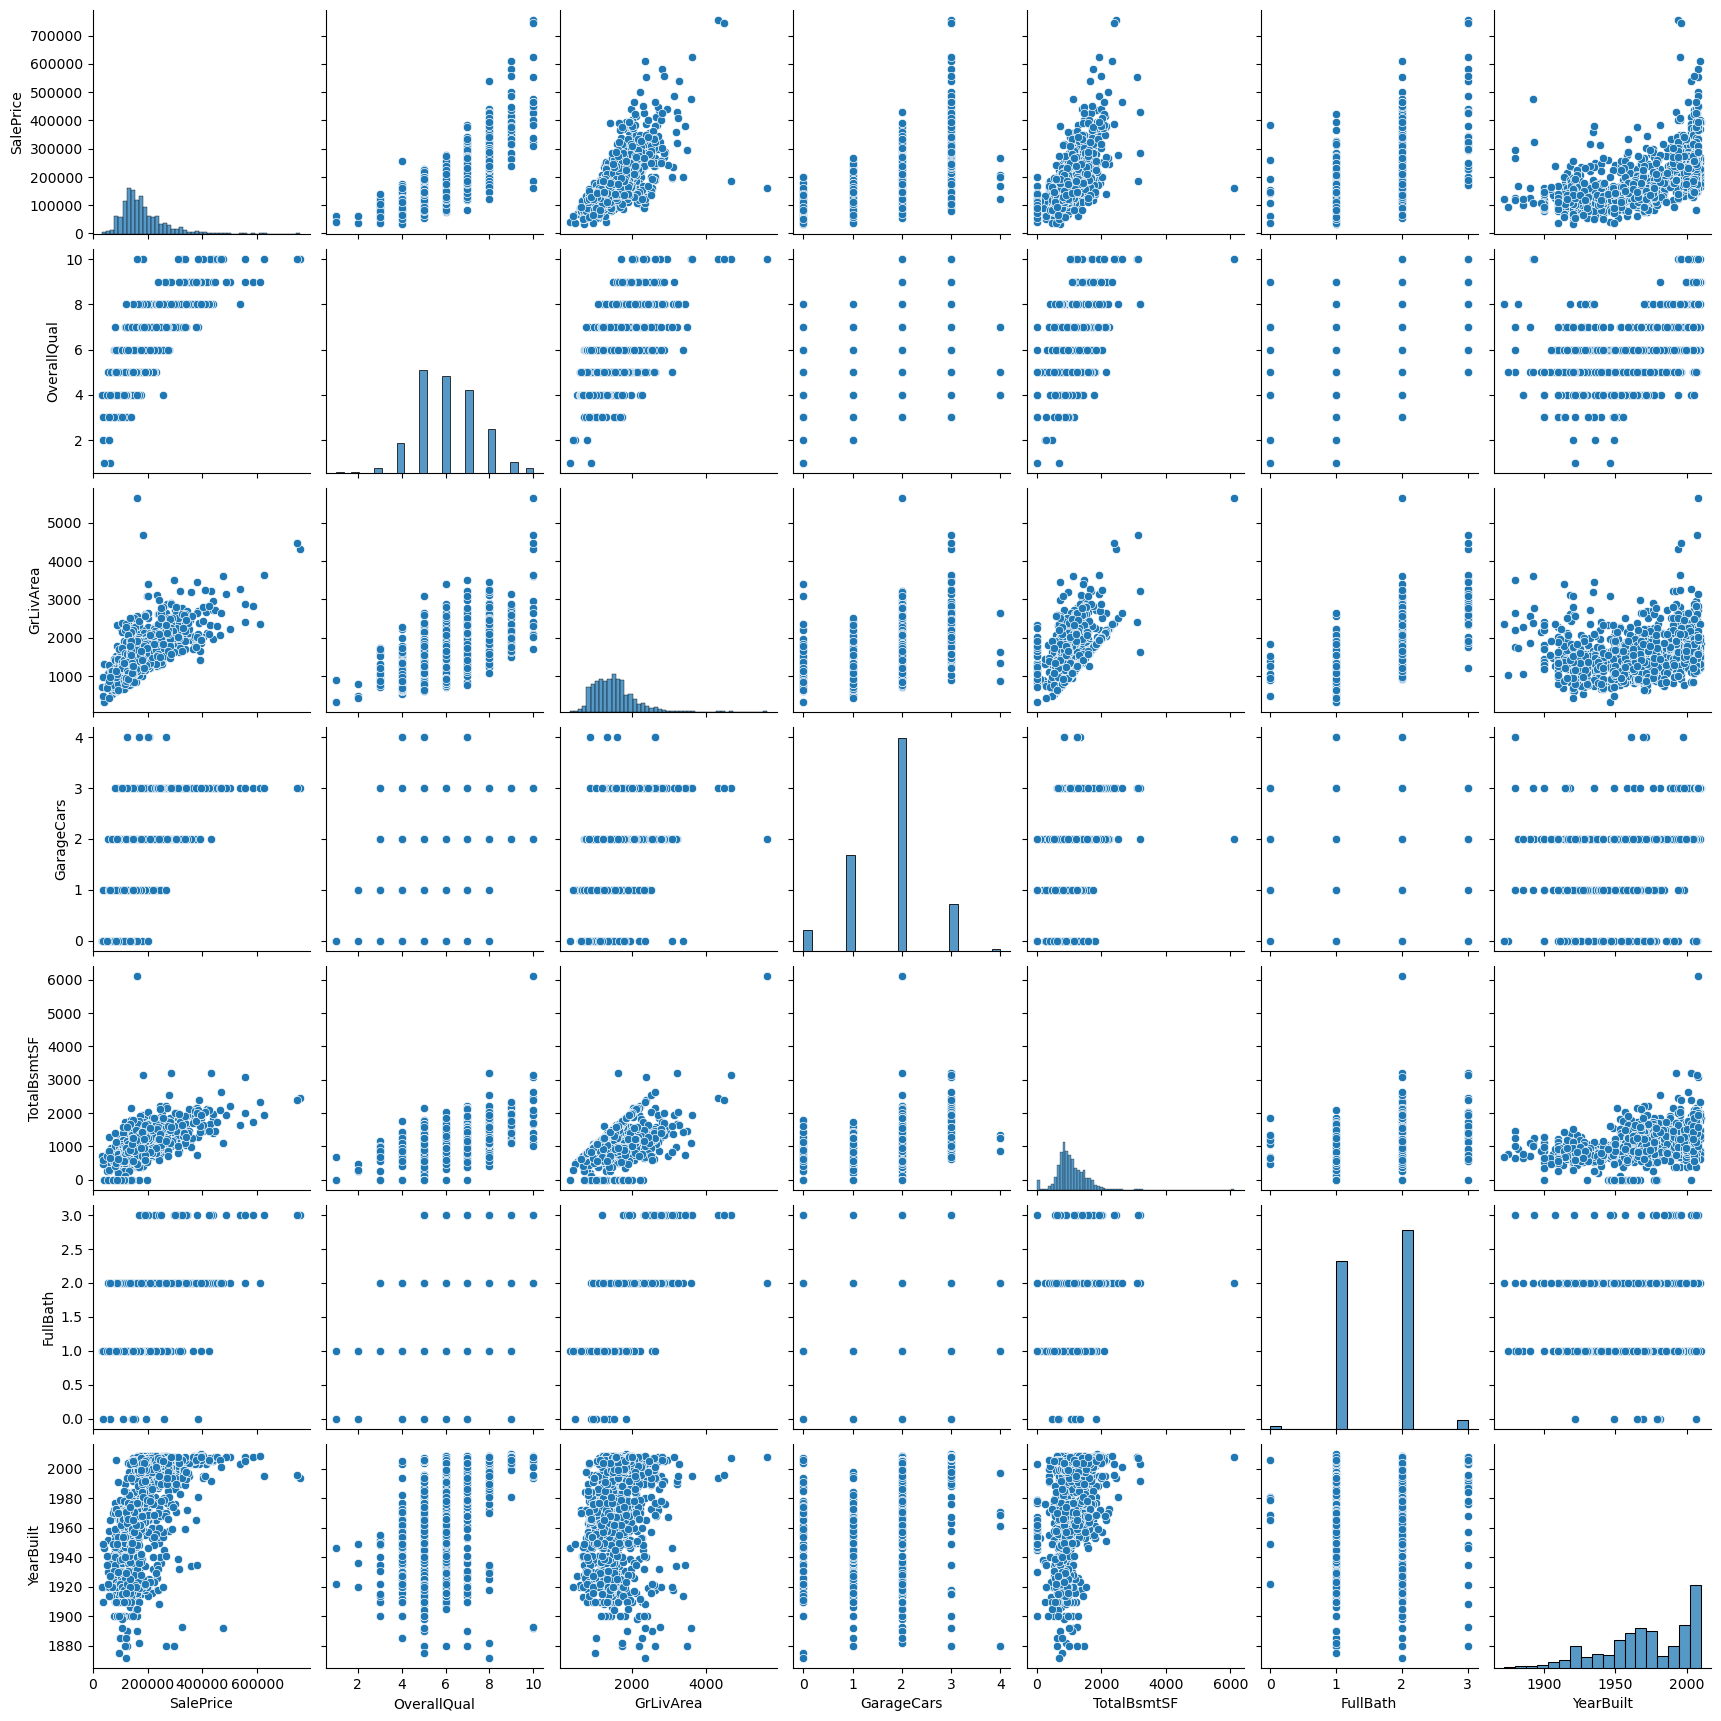

In [17]:
#Removed 3 variables that were strongly correlated with remaining variables to reduce redundancy
numerical_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
df_numericalVar_significant = df_numericalVar[numerical_cols]
#Pair plot of distribution and density of significant variables
sns.pairplot(df_numericalVar[numerical_cols])

In [18]:
#Numerical Dataframe of Significant Variables
#To Be Combined with Categorical Dataframe of Significant Variables
df_numericalVar_significant

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,208500.0,7.0,1710.0,2.0,856.0,2.0,2003.0
1,181500.0,6.0,1262.0,2.0,1262.0,2.0,1976.0
2,223500.0,7.0,1786.0,2.0,920.0,2.0,2001.0
3,140000.0,7.0,1717.0,3.0,756.0,1.0,1915.0
4,250000.0,8.0,2198.0,3.0,1145.0,2.0,2000.0
...,...,...,...,...,...,...,...
1455,175000.0,6.0,1647.0,2.0,953.0,2.0,1999.0
1456,210000.0,6.0,2073.0,2.0,1542.0,2.0,1978.0
1457,266500.0,7.0,2340.0,1.0,1152.0,2.0,1941.0
1458,142125.0,5.0,1078.0,1.0,1078.0,1.0,1950.0


Begin EDA of Categorical Variable Dataset

In [19]:
#Perform missing value treatment
mode_imputer = SimpleImputer(missing_values = pd.NA, strategy='most_frequent')
mode_imputer = mode_imputer.fit(df_categoricalVar)
imputed_df = mode_imputer.transform(df_categoricalVar.values)
df_categoricalVar = pd.DataFrame(data=imputed_df, columns=mode_imputer.get_feature_names_out())
df_categoricalVar

c:\Users\saini\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


Countplot for bivariate analysis where the variable, "SaleCondition", is compared to five other variables of the categorical dataframe

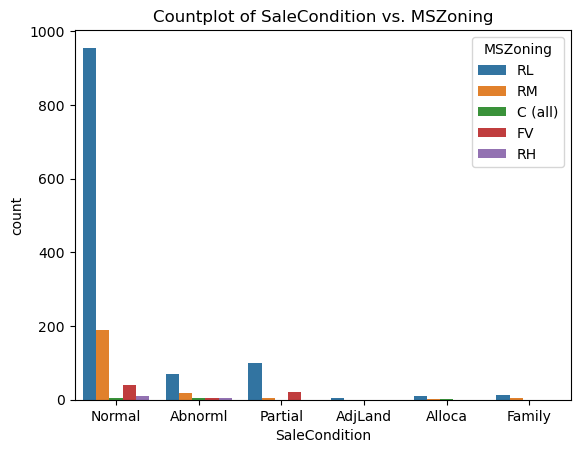

In [20]:
#Compare SaleCondition to MSZoning
plt.title('Countplot of SaleCondition vs. MSZoning')
sns.countplot(data=df_categoricalVar, x="SaleCondition", hue="MSZoning")
plt.show()


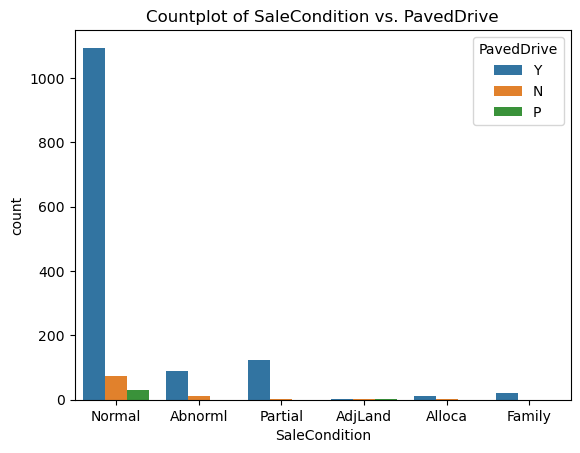

In [21]:
#Compare SaleCondition to PavedDrive
plt.title('Countplot of SaleCondition vs. PavedDrive')
sns.countplot(data=df_categoricalVar, x="SaleCondition", hue="PavedDrive")
plt.show()

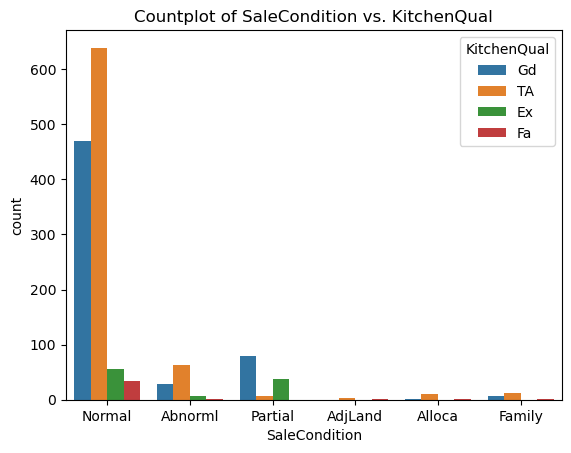

In [22]:
#Compare SaleCondition to KitchenQual
plt.title('Countplot of SaleCondition vs. KitchenQual')
sns.countplot(data=df_categoricalVar, x="SaleCondition", hue="KitchenQual")
plt.show()

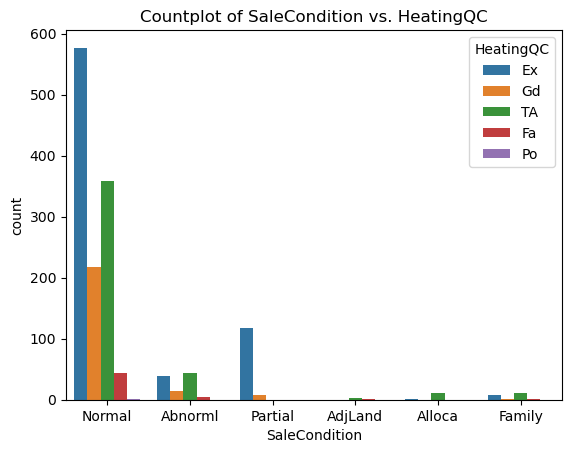

In [23]:
#Compare SaleCondition to HeatingQC
plt.title('Countplot of SaleCondition vs. HeatingQC')
sns.countplot(data=df_categoricalVar, x="SaleCondition", hue="HeatingQC")
plt.show()

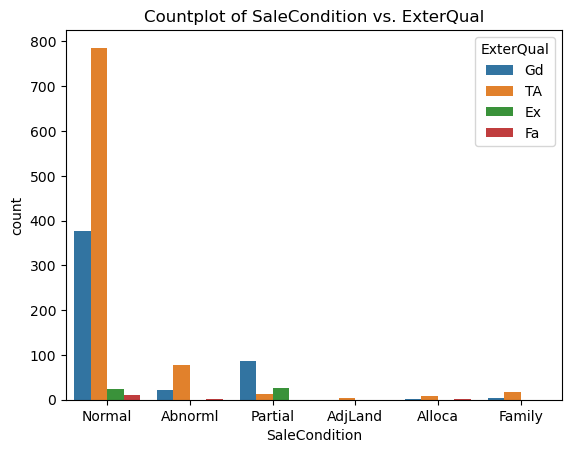

In [24]:
#Compare SaleCondition to ExterQual
plt.title('Countplot of SaleCondition vs. ExterQual')
sns.countplot(data=df_categoricalVar, x="SaleCondition", hue="ExterQual")
plt.show()

In [25]:
#Label Enconding for the Chi-Square Test
for col in df_categoricalVar.columns:
    le = LabelEncoder()
    df_categoricalVar[col] = le.fit_transform(df_categoricalVar[col])
df_categoricalVar

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,23,1,...,1,1,4,4,2,2,2,2,8,4
2,3,1,0,0,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
3,3,1,0,0,3,0,0,0,6,2,...,5,2,4,4,2,2,2,2,8,0
4,3,1,0,0,3,0,2,0,14,2,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,3,3,0,4,0,8,2,...,1,1,4,4,2,2,2,2,8,4
1456,3,1,0,3,3,0,4,0,13,2,...,1,2,4,4,2,2,2,2,8,4
1457,3,1,0,3,3,0,4,0,6,2,...,1,1,4,4,2,2,0,2,8,4
1458,3,1,0,3,3,0,4,0,24,2,...,1,2,4,4,2,2,2,2,8,4


In [26]:
#Chi-square test to find significant variables
#Return Chi and p values of each variable in comparison to the SaleCondition variable
#The higher the Chi value, the higher the importance of SaleCondition
#The opposite of Chi value is p value
x = df_categoricalVar.drop(columns=['SaleCondition'], axis=1)
y = df_categoricalVar['SaleCondition']
chiScores = chi2(x,y)
chiScores

(array([6.97882668e+00, 7.98721543e-02, 8.95549117e+00, 6.28159657e+00,
        6.37729026e+00, 1.34554455e+01, 5.44281867e+00, 8.92601177e+00,
        2.63508220e+01, 3.50827574e+00, 1.09291080e-01, 1.56917578e+01,
        7.40353700e+00, 4.52856695e+00, 4.61671727e+00, 2.59343763e+01,
        2.86197126e+01, 1.29395561e+01, 4.27335186e+01, 3.11669837e+00,
        3.49556249e+01, 7.54152513e+01, 6.31492676e-01, 2.71923776e+01,
        2.89266446e+01, 2.28890600e+00, 2.43599707e-01, 2.34023196e+02,
        1.53397607e+00, 7.02845538e+00, 4.74130547e+01, 1.67739753e+00,
        1.17583032e+01, 3.57076088e+01, 6.18816210e+01, 7.81598289e-01,
        3.47753540e-01, 4.28159390e+00, 6.86897461e-02, 1.01839006e+00,
        1.87562461e-03, 8.80913653e+01]),
 array([2.22219764e-01, 9.99906790e-01, 1.10852689e-01, 2.79774578e-01,
        2.71217914e-01, 1.94647933e-02, 3.64256770e-01, 1.12051941e-01,
        7.62871948e-05, 6.22135775e-01, 9.99797983e-01, 7.78150362e-03,
        1.92316466e-01

<Axes: >

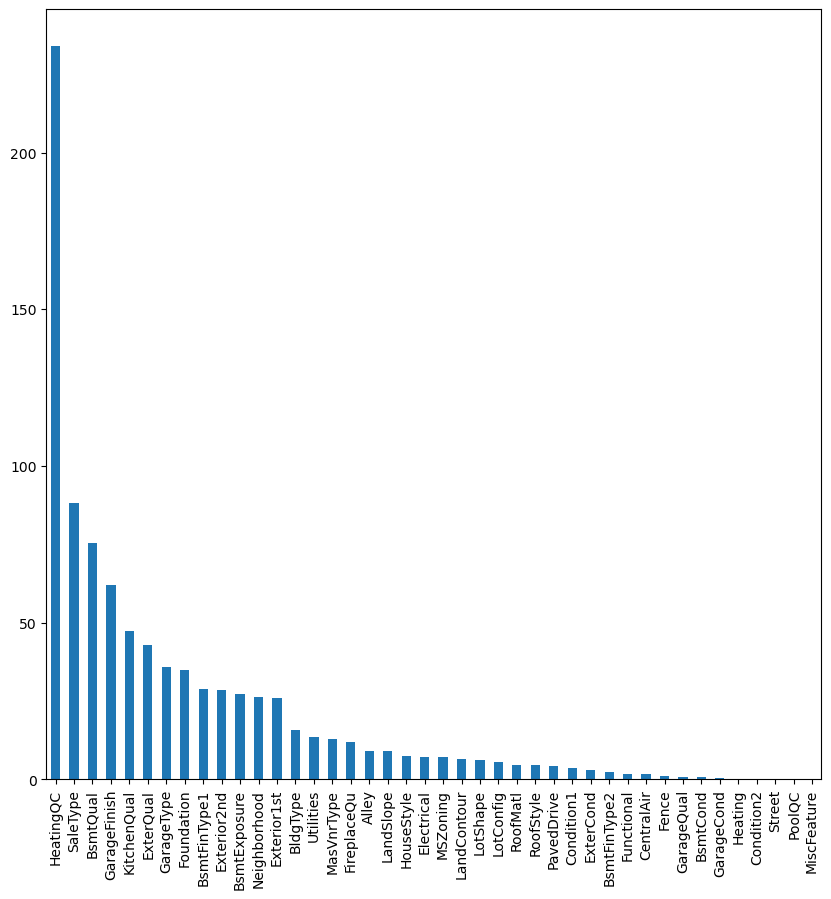

In [27]:
#Plot bar graph of the Chi values of each variable in relation to SaleCondition
chiValues = pd.Series(chiScores[0], index=x.columns)
chiValues.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,10))
chiValues.plot.bar()

<Axes: >

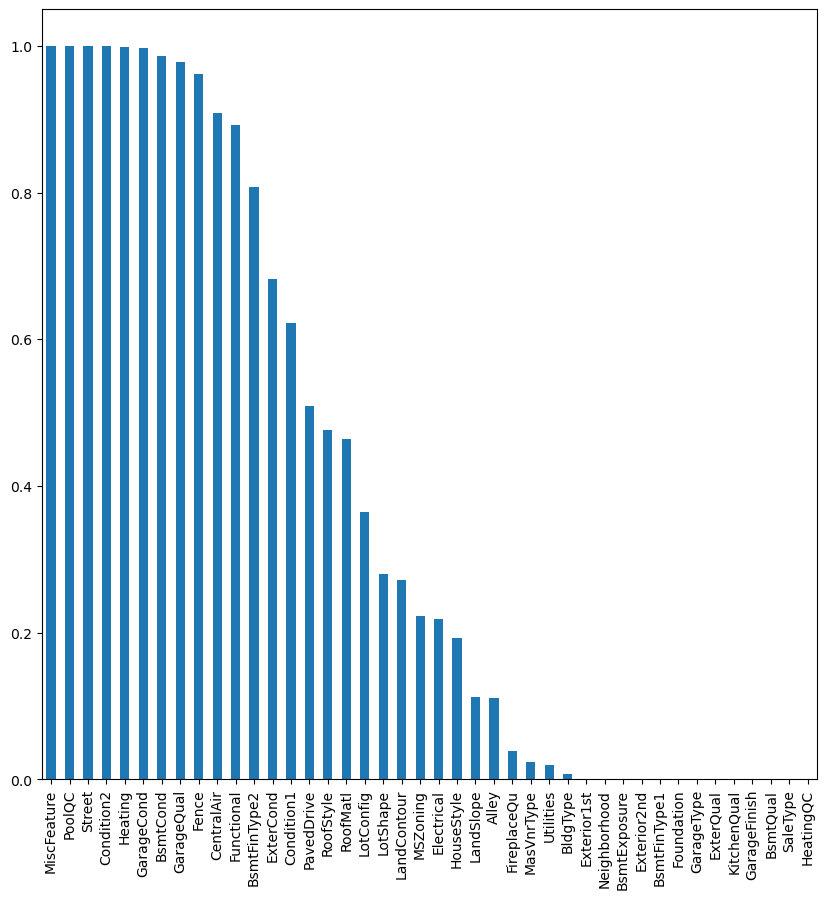

In [28]:
#Plot bar graph of the p values of each variable in relation to SaleCondition
pValues = pd.Series(chiScores[1], index=x.columns)
pValues.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,10))
pValues.plot.bar()

In [29]:
#Top 6 Chi values plus SaleCondition chosen as the significant variables of Categorical Dataframe
categorical_cols = ['HeatingQC', 'SaleType', 'BsmtQual', 'GarageFinish', 'KitchenQual', 'ExterQual', 'SaleCondition']
df_categoricalVar_significant = df_categoricalVar[categorical_cols]
df_categoricalVar_significant


,HeatingQC,SaleType,BsmtQual,GarageFinish,KitchenQual,ExterQual,SaleCondition
0,0,8,2,1,2,2,4
1,0,8,2,1,3,3,4
2,0,8,2,1,2,2,4
3,2,8,3,2,2,3,0
4,0,8,2,1,2,2,4
...,...,...,...,...,...,...,...
1455,0,8,2,1,3,3,4
1456,4,8,2,2,3,3,4
1457,0,8,3,1,2,0,4
1458,2,8,3,2,2,3,4


In [30]:
#Combine Dataframes of both the categorical and numerical dataframes
df_significantVar = pd.concat([df_numericalVar_significant, df_categoricalVar_significant], axis=1)
df_significantVar

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,HeatingQC,SaleType,BsmtQual,GarageFinish,KitchenQual,ExterQual,SaleCondition
0,208500.0,7.0,1710.0,2.0,856.0,2.0,2003.0,0,8,2,1,2,2,4
1,181500.0,6.0,1262.0,2.0,1262.0,2.0,1976.0,0,8,2,1,3,3,4
2,223500.0,7.0,1786.0,2.0,920.0,2.0,2001.0,0,8,2,1,2,2,4
3,140000.0,7.0,1717.0,3.0,756.0,1.0,1915.0,2,8,3,2,2,3,0
4,250000.0,8.0,2198.0,3.0,1145.0,2.0,2000.0,0,8,2,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6.0,1647.0,2.0,953.0,2.0,1999.0,0,8,2,1,3,3,4
1456,210000.0,6.0,2073.0,2.0,1542.0,2.0,1978.0,4,8,2,2,3,3,4
1457,266500.0,7.0,2340.0,1.0,1152.0,2.0,1941.0,0,8,3,1,2,0,4
1458,142125.0,5.0,1078.0,1.0,1078.0,1.0,1950.0,2,8,3,2,2,3,4


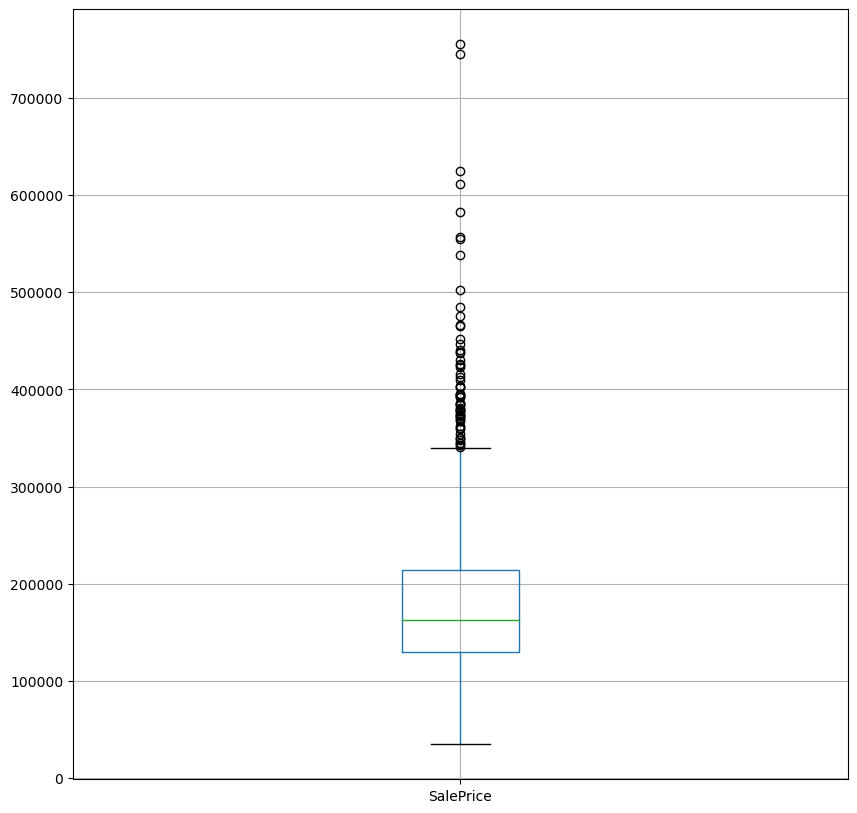

In [31]:
#Plot box plot to find variables with outliers
#Three Boxplots are shown to effectively show outliers
plt.figure(figsize=(10,10))
boxplot = df_significantVar.boxplot(column=['SalePrice'])

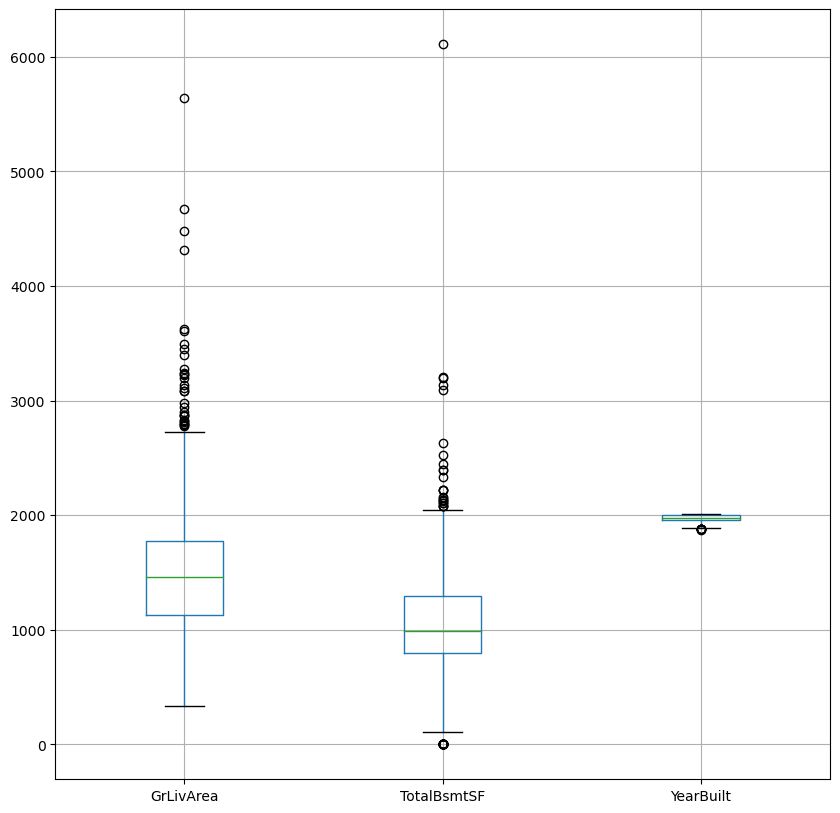

In [32]:
plt.figure(figsize=(10,10))
boxplot2 = df_significantVar.boxplot(column=['GrLivArea', 'TotalBsmtSF', 'YearBuilt'])

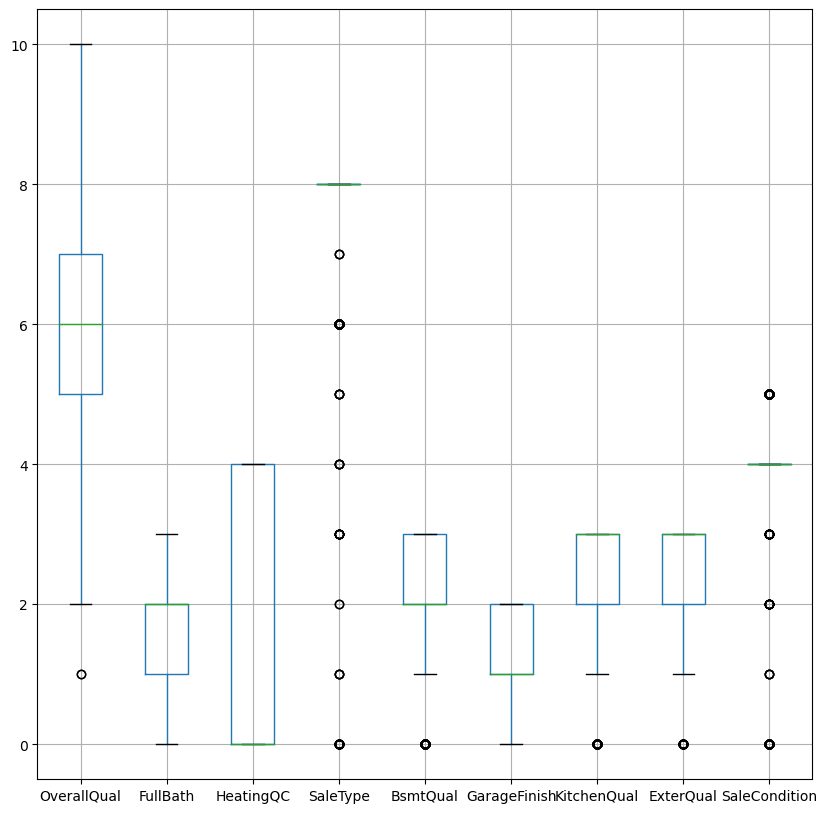

In [33]:
plt.figure(figsize=(10,10))
boxplot3 = df_significantVar.boxplot(column=['OverallQual', 'FullBath', 'HeatingQC', 'SaleType', 'BsmtQual', 'GarageFinish', 'KitchenQual', 'ExterQual', 'SaleCondition'])